# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0711515s

## ZAPOSLENE OSEBE PO VIŠINI NETO PLAČE PO DEJAVNOSTIH IN SPOLU

In [3]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Import the .csv file with ';' as the delimiter
neto_placa = pd.read_csv("../../podatki/placa/neto_placa.csv", sep=";")

# Replace 'z' and '-' with NaN values
neto_placa.iloc[:, 3:] = neto_placa.iloc[:, 3:].replace(['z', '-'], pd.np.nan)

# Convert column names to uppercase
neto_placa.columns = neto_placa.columns.str.upper()

# Convert rows to uppercase
neto_placa['SKD DEJAVNOST'] = neto_placa['SKD DEJAVNOST'].str.upper()
neto_placa['SPOL'] = neto_placa['SPOL'].str.upper()
neto_placa['STATUS ZAPOSLITVE'] = neto_placa['STATUS ZAPOSLITVE'].str.upper()

# Instantiate KNNImputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Apply KNNImputer to replace missing values
neto_placa.iloc[:, 4:] = imputer.fit_transform(neto_placa.iloc[:, 4:]).astype(int)

# Continue with your analysis or visualization code

In [18]:
# Shranimo v .xlsx datoteko
#neto_placa.to_excel('neto_placa.xlsx', index=False)

In [4]:
# Pregled vseh stolpcev
print(neto_placa.columns)

Index(['SKD DEJAVNOST', 'SPOL', 'STATUS ZAPOSLITVE', 'LETO',
       'RAZRED NETO - SKUPAJ', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')


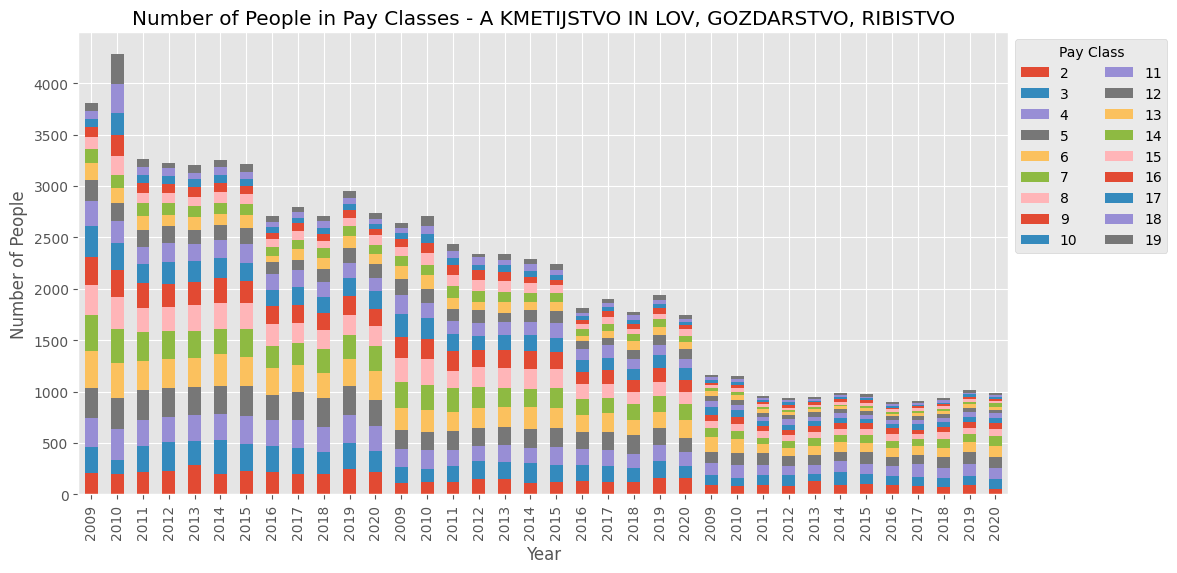

In [6]:
import matplotlib.pyplot as plt

# Filter data for the specific activity
activity_data = neto_placa.loc[neto_placa['SKD DEJAVNOST'] == 'A KMETIJSTVO IN LOV, GOZDARSTVO, RIBISTVO'].copy()

# Select columns representing the pay classes
pay_classes = activity_data.columns[6:-1]  # Exclude the 'RAZRED NETO - SKUPAJ' column

# Get the combined number of people in all classes
activity_data['Total'] = activity_data[pay_classes].sum(axis=1)

# Set plot style
plt.style.use('ggplot')

# Create a stacked bar plot
activity_data.plot(x='LETO', y=pay_classes, kind='bar', stacked=True, figsize=(12, 6))

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Number of People in Pay Classes - A KMETIJSTVO IN LOV, GOZDARSTVO, RIBISTVO')

# Show the legend with 2 columns
plt.legend(title='Pay Class', bbox_to_anchor=(1, 1), loc='upper left', ncol=2)

# Display the plot
plt.show()

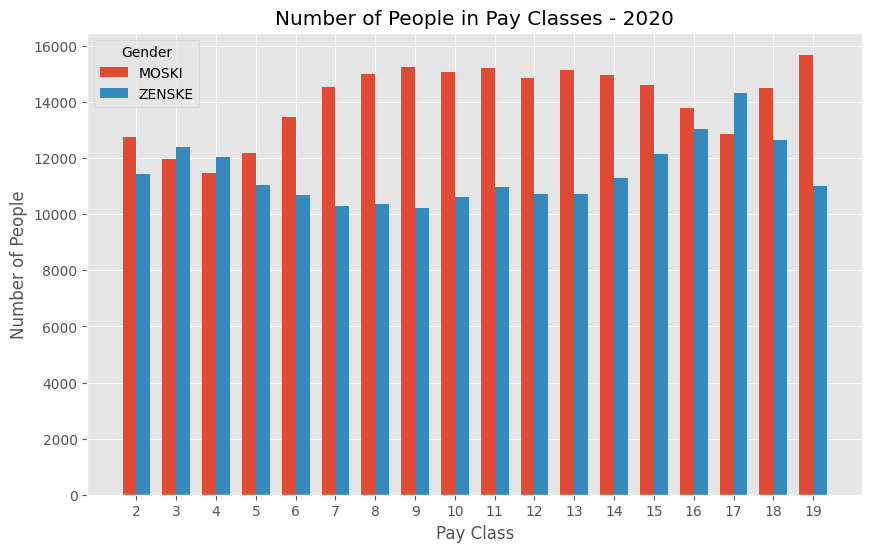

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the data for the specific year
year_data = neto_placa[neto_placa['LETO'] == 2020]

# Exclude the 'RAZRED NETO - SKUPAJ' column
pay_classes = year_data.columns[6:-1]

# Exclude the 'SPOL - SKUPAJ' row
gender_data = year_data[year_data['SPOL'] != 'ZAPOSLENI - SKUPAJ']

# Group the data by gender and calculate the sum of people in each pay class
grouped_data = gender_data.groupby('SPOL')[pay_classes].sum()

# Set the bar width
bar_width = 0.35

# Set the x-axis positions
x = np.arange(len(pay_classes))

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bars for each gender
plt.bar(x - bar_width/2, grouped_data.loc['MOSKI'], width=bar_width, label='MOSKI')
plt.bar(x + bar_width/2, grouped_data.loc['ZENSKE'], width=bar_width, label='ZENSKE')

# Set the axis labels and title
plt.xlabel('Pay Class')
plt.ylabel('Number of People')
plt.title('Number of People in Pay Classes - 2020')

# Set the tick labels
plt.xticks(x, pay_classes)

# Show the legend
plt.legend(title='Gender')

# Display the plot
plt.show()



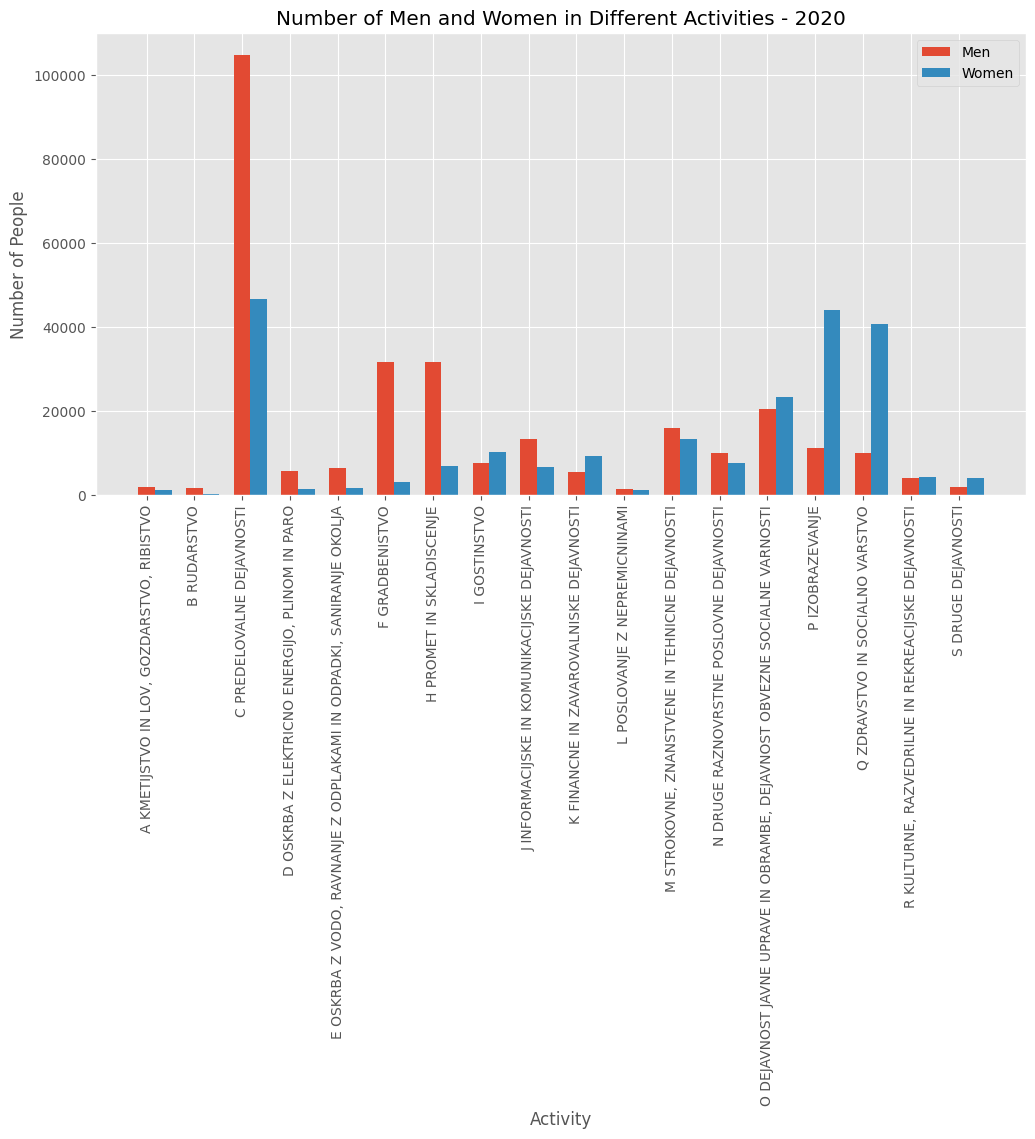

In [22]:
import matplotlib.pyplot as plt

# Filter data for the year 2020
data_2020 = neto_placa[neto_placa['LETO'] == 2020]

# Group the data by activity and gender and calculate the sum of 'RAZRED NETO - SKUPAJ'
activity_gender_sum = data_2020.groupby(['SKD DEJAVNOST', 'SPOL'])['RAZRED NETO - SKUPAJ'].sum().unstack()

# Get the activities and genders
activities = activity_gender_sum.index
genders = activity_gender_sum.columns

# Set the figure size
plt.figure(figsize=(12, 6))

# Set the width of each bar
bar_width = 0.35

# Set the x-axis positions for the bars
x = range(len(activities))

# Plot the bars for each gender
plt.bar(x, activity_gender_sum['MOSKI'], width=bar_width, label='Men')
plt.bar([val + bar_width for val in x], activity_gender_sum['ZENSKE'], width=bar_width, label='Women')

# Set the axis labels and title
plt.xlabel('Dejavnosti')
plt.ylabel('Število ljudi')
plt.title('Število ljudi po spolu glede na aktivnost - 2020')

# Set the tick labels
plt.xticks(range(len(activities)), activities, rotation=90)

# Show the legend
plt.legend()

# Display the plot
plt.show()

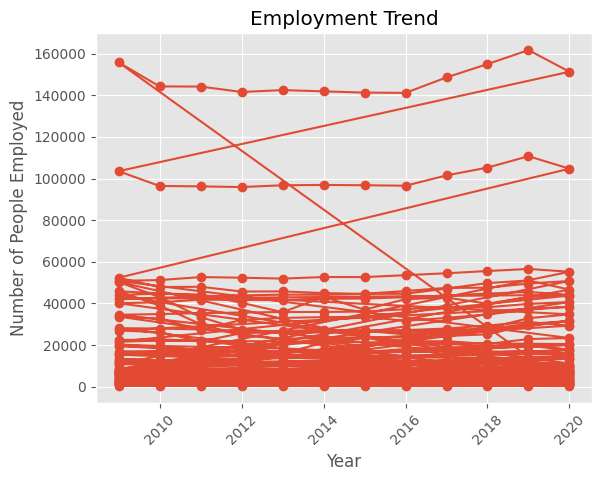

In [24]:
import matplotlib.pyplot as plt

# Plot the time series
plt.plot(neto_placa['LETO'], neto_placa['RAZRED NETO - SKUPAJ'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of People Employed')
plt.title('Employment Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

---

# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0711510s

## ZAPOSLENE OSEBE PO VIŠINI BRUTO PLAČE PO DEJAVNOSTIH IN SPOLU

In [4]:
# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo šumnike nadomestili s sprejemljivimi inačicami (Š - S, Č - C, Ž - Z)

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
bruto_placa = pd.read_csv("../../podatki/placa/bruto_placa.csv", sep = ";")

# V naši podatkovni zbirki vrednost 'z' in '-' predstavlja manjkajoči podatek - nadomestimo jih z NaN vrednostjo, ki jo bomo
# ustrezno nadomestili z uporabo strojnega učenja
bruto_placa.iloc[:, 3:] = bruto_placa.iloc[:, 3:].replace('z', pd.np.nan)
bruto_placa.iloc[:, 3:] = bruto_placa.iloc[:, 3:].replace('-', pd.np.nan)

# Pretvorimo imena stolpcev v velike črke
bruto_placa.columns = bruto_placa.columns.str.upper()

# Pretvorimo vrstice v velike črke
bruto_placa['SKD DEJAVNOST'] = bruto_placa['SKD DEJAVNOST'].apply(lambda x: x.upper())
bruto_placa['SPOL'] = bruto_placa['SPOL'].apply(lambda x: x.upper())
bruto_placa['STATUS ZAPOSLITVE'] = bruto_placa['STATUS ZAPOSLITVE'].apply(lambda x: x.upper())

# Izberemo 5 najbljižjih sosedov
imputer = KNNImputer(n_neighbors=5)

# Nad vsakim stolpec uporabimo KNNImputer, da nadomestimo manjkajoče vrednosti z napovedjo
bruto_placa.iloc[:, 4:] = imputer.fit_transform(bruto_placa.iloc[:, 4:])

# Prve tri stolpce pretvorimo v 'STRING'
bruto_placa.iloc[:, 0:3] = bruto_placa.iloc[:, 0:3].astype(str)
# Preostale stolpce pretvorimo v 'INTEGER'
bruto_placa.iloc[:, 4:] = bruto_placa.iloc[:, 4:].astype(int)

In [5]:
# Shranimo v .xlsx datoteko
# bruto_placa.to_excel('bruto_placa.xlsx', index=False)

In [6]:
# Pregled vseh stolpcev
print(bruto_placa.columns)

Index(['SKD DEJAVNOST', 'SPOL', 'STATUS ZAPOSLITVE', 'LETO',
       'RAZRED NETO - SKUPAJ', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')


---